In [ ]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 


from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

Reading the CSV file

In [ ]:
df = pd.read_csv(r'../content/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  937
title                      937
text                       937
language                   937
site_url                   937
main_img_url               937
type                       937
label                      937
title_without_stopwords    937
text_without_stopwords     937
hasImage                   937
dtype: int64

In [ ]:
df.head(5)

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci'],
      dtype=object)

In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


DISTRIBUTION OF TYPES OF ARTICLES

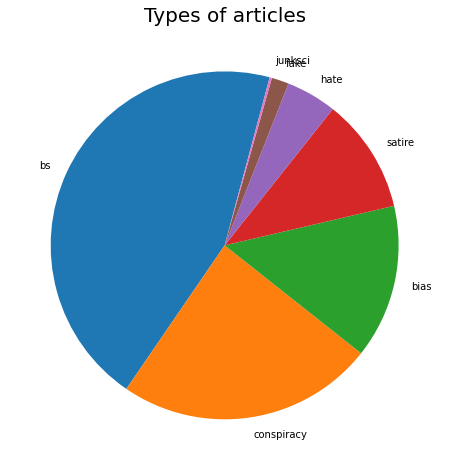

In [ ]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

UNIGRAMS AND BIGRAMS

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams used in articles',color='blue')

In [ ]:
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['words' ,'count'])
df3.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used in articles', color='blue')

WORD CLOUD OF ARTICLES

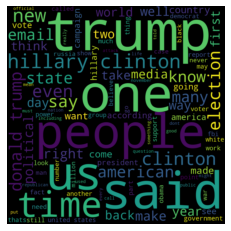

In [ ]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


ARTICLES INCLUDING IMAGES VS LABEL

In [ ]:
fig = px.bar(df, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [ ]:
def convert(path):
    return '<img src="'+ path + '" width="80">'
df_sources = df[['site_url','label','main_img_url']]
df_r = df_sources.loc[df['label']== 'Real'].iloc[6:10,:]
df_f = df_sources.loc[df['label']== 'Fake'].head(6)
HTML(df_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,
Fed Up,100percentfedup.com,Real,


In [ ]:
HTML(df_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
author,,,
No Author,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,
Mike Rivero,21stcenturywire.com,Fake,
No Author,21stcenturywire.com,Fake,
Shawn Helton,21stcenturywire.com,Fake,


In [ ]:
df['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com'],
      dtype=object)

In [ ]:
type_label = {'Real': 0, 'Fake': 1}
df_sources.label = [type_label[item] for item in df_sources.label] 
val_real=[]
val_fake=[]

for i,row in df_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

WEBSITE PUBLISHING REAL NEWS

In [ ]:
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"{y_}Websites publishing real news:{g_}{uniqueValues_real}\n") 

Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com']



WEBSITES PUBLISHING FAKE NEWS

In [ ]:
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"{y_}Websites publishing fake news:{r_}{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com']



WEBSITES PUBLISHING BOTH REAL AND FAKE NEWS

In [ ]:
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"{y_}Websites publishing both real and fake news:{m_}{real_set & fake_set}\n")

Websites publishing both real and fake news:{'davidduke.com'}



In [ ]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

LABEL VS TYPE

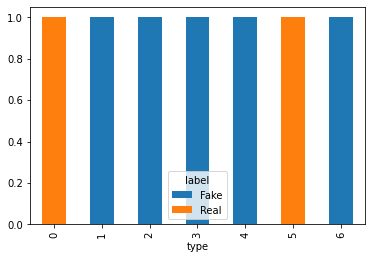

In [ ]:
plot_bar(df,'type' , 'label')
plt.show()

In [ ]:
fig = px.sunburst(df, path=['label', 'type'])
fig.show()

In [ ]:
df_type = df[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]
{'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)
uv_bias = list(OrderedDict.fromkeys(val_bias)) 
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy)) 
uv_fake = list(OrderedDict.fromkeys(val_fake1)) 
uv_bs = list(OrderedDict.fromkeys(val_bs)) 
uv_satire = list(OrderedDict.fromkeys(val_satire)) 
uv_hate = list(OrderedDict.fromkeys(val_hate)) 
uv_junksci = list(OrderedDict.fromkeys(val_junksci)) 
uv_state = list(OrderedDict.fromkeys(val_state)) 

print(f"{b_}{type1}\n")
i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state): 
    print(f"{y_}Source URLs for type:{b_}{i}{r_}{lst}\n") 
    i+=1

{'bias': 0, 'conspiracy': 1, 'fake': 2, 'bs': 3, 'satire': 4, 'hate': 5, 'junksci': 6, 'state': 7}

Source URLs for type:0['100percentfedup.com', 'addictinginfo.org', 'dailywire.com']

Source URLs for type:1['21stcenturywire.com', 'activistpost.com', 'awdnews.com']

Source URLs for type:2['abcnews.com.co', 'adobochronicles.com']

Source URLs for type:3['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com']

Source URLs for type:4['clickhole.com']

Source URLs for type:5['davidduke.com']

Source URLs for type:6['davidstockmanscontracorner.com', 'davidwolfe.com']

Source URLs for type:7[]


SHUFFLING VALUES

In [ ]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
No Author,2016-11-06T07:48:00.000+02:00,prof michel chossudovsky discusses hillary cli...,november by wire leave a comment \nepisode ...,english,21stcenturywire.com,http://i1.wp.com/21stcenturywire.com/wp-conten...,1,Fake,prof michel chossudovsky discusses hillary cli...,november wire leave comment episode sunday wir...,1.0
Alex Ansary,2016-11-07T20:01:08.261+02:00,us military hackers claim penetration of russia,trump breaks from stump speech to admire beaut...,english,amtvmedia.com,http://www.amtvmedia.com/wp-content/uploads/20...,3,Fake,us military hackers claim penetration russia,trump breaks stump speech admire beautiful tru...,1.0
Anonymous,2016-10-29T09:34:00.000+03:00,no title,its dark alright in a sad twist of fate these...,english,abeldanger.net,No Image URL,3,Fake,title,dark alright sad twist fate black people power...,0.0
Anonymous,2016-11-02T00:14:00.000+02:00,no title,link hey people i always enjoy your threads th...,english,abeldanger.net,No Image URL,3,Fake,title,link hey people always enjoy threads though th...,0.0
Alex Ansary,2016-11-07T20:01:08.718+02:00,kremlin nato was created for agression,janet reno first female us attorney general di...,english,amtvmedia.com,http://www.amtvmedia.com/wp-content/uploads/20...,3,Fake,kremlin nato created agression,janet reno first female us attorney general di...,1.0


TRAINING AND TESTING

In [ ]:
y = df1.type

x = df1.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())
tfidf_vect

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_train.shape

(655, 21647)

AdaBoost works in iterations with a base classifier to ensure accurate predictions of unusual observations.

It works in iterations and within each iteration, incorrect observations are given a higher probability for classification for the next iteration.

The AdaBoost implemented here has a Decision Tree Classifier as the base classifier with a max depth of the tree being 10.

In [ ]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.986


In [ ]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.794
